In [1]:
import pandas as pd

import layoutparser as lp 
import cv2

import matplotlib.pyplot as plt
%matplotlib inline 

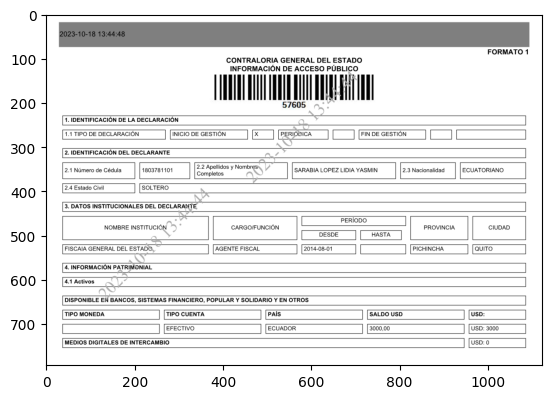

In [2]:
image = cv2.imread('sample_img.png')
plt.imshow(image)

**Load Google Vision Agent**

To set-up your Google Vision Agent you need an API key stored in your local computer. Follow this link for instructions on how to get the key.

In [4]:
ocr_agent = lp.GCVAgent.with_credential(
  r"path_to_key_here",
  languages = ['es']
)

**Convert Info to Text**

In [5]:
res = ocr_agent.detect(image, return_response=True)
texts  = ocr_agent.gather_text_annotations(res) 

In [6]:
# Convert to df and have columns for vertices
df = texts.to_dataframe()[['text', 'points']]
df['x0'] = df['points'].apply(lambda l: [l[0], l[1], l[2], l[5]])
df[['x0', 'y0', 'x1', 'y1']] = pd.DataFrame(df['x0'].tolist())

**Load Positions**

In [7]:
positions = {
    'cargo': [208, 510, 656, 579],
    'ciudad': [940, 510, 1114, 579],
     'civil': [192, 373, 578, 427],
     'desde': [534, 510, 773, 579],
     'gestion': [270, 252, 931, 305],
     'hasta': [683, 510, 873, 579],
     'institucion': [27, 510, 456, 579],
     'prov': [807, 510, 997, 579]
}

**Functions to extract data**

In [8]:
def txt_box(pos:list, data:pd.DataFrame) -> str:
  vals = data.query(f"x0>={pos[0]} and y0>={pos[1]} and x1<={pos[2]} and y1<={pos[3]}").text
  return ' '.join(vals)

In [9]:
res = {}
for cargo, position in positions.items():
  res[cargo] = txt_box(position, df)

In [10]:
res

{'cargo': 'AGENTE FISCAL 2014-08-01',
 'ciudad': 'QUITO',
 'civil': 'SOLTERO',
 'desde': '2014-08-01',
 'gestion': 'INICIO DE GESTIÓN FIN DE GESTIÓN',
 'hasta': '',
 'institucion': 'FISCAIA GENERAL DEL ESTADO 2009-08 AGENTE',
 'prov': 'PICHINCHA'}